### Introduction


**This project aims to use a Logistic Regression Classifier along with traditional machine learning feature extraction techniques, to identify hate speech on the Twitter social media platform. It demonstrates the key processes involved in a text cleaning workflow, as well as the use of  some key functions and classes from the nltk library. Wheras a Logistic Regression classifier may not be the best classifier for this type of task, the project helps us to understand the challenges and possible solutions of the class imbalance problem, as well as the need to emphasize particular evaluation metrics over others, in particular problems.**

In [1]:
import pandas as pd
import re

### 1. Loading of the tweets file

In [2]:
df = pd.read_csv("TwitterHate.csv", index_col=0)

In [3]:
df.head()

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [4]:
df.shape

(31962, 2)

In [5]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
df.label.value_counts(normalize=True)
#Only 7% of the tweets have been labelled as hate speech.
#Classes are heavily imbalanced

0    0.929854
1    0.070146
Name: label, dtype: float64

### 2. Gettin the tweets into a series for easy text cleanup and manipulation

In [7]:
tweets = df.tweet
tweets.head()

id
1     @user when a father is dysfunctional and is s...
2    @user @user thanks for #lyft credit i can't us...
3                                  bihday your majesty
4    #model   i love u take with u all the time in ...
5               factsguide: society now    #motivation
Name: tweet, dtype: object

###  3. Text Cleaning I - removing user handles and URLs.



In [8]:
def handle_remover(tweet):
    
    """
    This function takes a single tweet and removes the user handle from the tweet.
    """
    
    tweet = tweet.lower()
    pattern = re.compile("@[A_Za-z0-9_]+")
    tweet = pattern.sub("", tweet)
    
    return tweet

In [9]:
def url_remover(tweet):
    """
        This function takes a simgle tweet and replaces any urls within the tweet.
    """
    pattern1 = re.compile(r"(www\.\w+\.[a-z]+|\w+\.com)")
    tweet = pattern1.sub("", tweet)
    
    
        
    return tweet


In [10]:
cleaned_tweets1 = tweets.apply(handle_remover).apply(url_remover)

In [11]:
cleaned_tweets1

id
1          when a father is dysfunctional and is so sel...
2          thanks for #lyft credit i can't use cause th...
3                                      bihday your majesty
4        #model   i love u take with u all the time in ...
5                   factsguide: society now    #motivation
                               ...                        
31958    ate  isz that youuu?ððððððð...
31959      to see nina turner on the airwaves trying to...
31960    listening to sad songs on a monday morning otw...
31961     #sikh #temple vandalised in in #calgary, #wso...
31962                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

### 4. Text Cleaning II - tokenization and removal of stopwords, punctuations and redundant words

In [12]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from string import punctuation

In [13]:
tt = TweetTokenizer()

In [14]:
def remove_redundancies(tweet):
    """
    This function takes a single tweet, removes stopwords, punctuations, single character words, 
    non - alphanumeric words, some redundant words as well as the # from hastags.
    """
    tweet = re.sub(r"#+(\w+)", r"\1", tweet) 
    #This function will remove the #symbols from hashtags while preserving the rest of the term.
    s_words = stopwords.words("english")
    s_words2 = set(s_words).union(set(punctuation))
    s_words2 = s_words2.union({"rt", "amp"}) 
    #The above line of code will add the terms "rt" and "amp" to the list of stopwords.
    tokenized_tweet = tt.tokenize(tweet)
    tweet1 = [word for word in tokenized_tweet if word not in s_words2 and word.isalnum() and len(word) > 1]
    #the code above will remove stopwords, words with non - alphanumeric characters and single character words.
    
    
    
    return tweet1



clean_tweets2 = cleaned_tweets1.apply(remove_redundancies)

   
#Differes from word tokenize in that it does not separate hashtags

In [15]:
clean_tweets2.head()

id
1    [father, dysfunctional, selfish, drags, kids, ...
2    [thanks, lyft, credit, use, cause, offer, whee...
3                                    [bihday, majesty]
4                       [model, love, take, time, urð]
5                    [factsguide, society, motivation]
Name: tweet, dtype: object

### 5.  Getting all words in a single list for word frequency computations

In [16]:
word_list = [word for tweet in clean_tweets2 for word in tweet]

In [17]:
len(word_list)

241691

In [18]:
word_list[:20]

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run',
 'thanks',
 'lyft',
 'credit',
 'use',
 'cause',
 'offer',
 'wheelchair',
 'vans',
 'pdx',
 'disapointed',
 'getthanked',
 'bihday',
 'majesty']

In [19]:
from nltk import FreqDist

In [20]:
dist = FreqDist(word_list)
dist

FreqDist({'love': 2680, 'day': 2273, 'happy': 1683, 'time': 1128, 'life': 1103, 'like': 1097, 'today': 1008, 'new': 988, 'positive': 929, 'thankful': 920, ...})

In [21]:
dist.most_common(10)
#below are the top 10 most commonly used words in the corpus, along with their frequency of usage.

[('love', 2680),
 ('day', 2273),
 ('happy', 1683),
 ('time', 1128),
 ('life', 1103),
 ('like', 1097),
 ('today', 1008),
 ('new', 988),
 ('positive', 929),
 ('thankful', 920)]

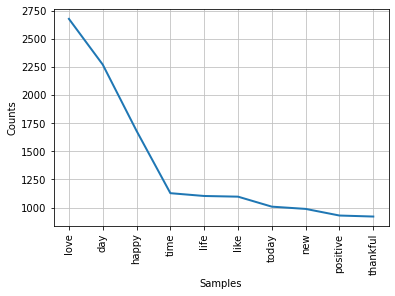

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
dist.plot(10)
#Below is a plot of the frequencies of the top 10 most frequent words in the corpus.

### 6.  Formatting the data for predictive modelling

In [23]:
clean_tweets2

id
1        [father, dysfunctional, selfish, drags, kids, ...
2        [thanks, lyft, credit, use, cause, offer, whee...
3                                        [bihday, majesty]
4                           [model, love, take, time, urð]
5                        [factsguide, society, motivation]
                               ...                        
31958                                    [ate, isz, youuu]
31959    [see, nina, turner, airwaves, trying, wrap, ma...
31960    [listening, sad, songs, monday, morning, otw, ...
31961    [sikh, temple, vandalised, calgary, wso, conde...
31962                                      [thank, follow]
Name: tweet, Length: 31962, dtype: object

In [24]:
X = clean_tweets2.apply(lambda x: " ".join(x))

In [25]:
X.head()
#Instead of a Series of lists we have a Series of strings.
#This can now be operated on by our Feature Extraction algorithm.

id
1    father dysfunctional selfish drags kids dysfun...
2    thanks lyft credit use cause offer wheelchair ...
3                                       bihday majesty
4                             model love take time urð
5                        factsguide society motivation
Name: tweet, dtype: object

In [26]:
y = df.label

In [27]:
print(len(X), len(y))

31962 31962


In [28]:
data2 = pd.merge(X, y, left_index=True, right_index=True)
final_data = data2[data2.tweet.apply(len) != 0]
#This will eliminate all the entries in the series of documents that are empty strings after text preprocessing.

In [29]:
len(final_data) / len(data2)
#This shows we have retained 99.88% of the data.
#1.2 % of the documents resulted in empty strings after preprocessing.

0.9988423753206933

In [30]:
final_data.head()

,tweet,label
id,,
1,father dysfunctional selfish drags kids dysfun...,0
2,thanks lyft credit use cause offer wheelchair ...,0
3,bihday majesty,0
4,model love take time urð,0
5,factsguide society motivation,0


In [31]:
final_data.label.value_counts(normalize=True)

0    0.929898
1    0.070102
Name: label, dtype: float64

### 7. Data Splitting and Feature Extraction

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
X_train, X_test, y_train, y_test = train_test_split(final_data.tweet, 
                                                    final_data.label, stratify=final_data.label)

In [34]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(23943,) (23943,) (7982,) (7982,)


In [35]:
y_train.value_counts(normalize=True)

0    0.929917
1    0.070083
Name: label, dtype: float64

In [36]:
y_test.value_counts(normalize=True)
#The distribution of data in train and test sets are equal. This is very important.

0    0.929842
1    0.070158
Name: label, dtype: float64

In [37]:
tfidf = TfidfVectorizer(max_features=5000)

In [38]:
train_matrix = tfidf.fit_transform(X_train)

In [39]:
test_matrix = tfidf.transform(X_test)

In [40]:
train_matrix

<23943x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 135083 stored elements in Compressed Sparse Row format>

In [41]:
test_matrix

<7982x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 43570 stored elements in Compressed Sparse Row format>

### 8. Model Building and Training (Part 1)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

In [43]:
clf = LogisticRegression()

In [44]:
clf.fit(train_matrix, y_train)

LogisticRegression()

In [45]:
train_predictions = clf.predict(train_matrix)
test_predictions = clf.predict(test_matrix)


In [46]:
confusion_matrix(y_train, train_predictions)

array([[22233,    32],
       [ 1045,   633]], dtype=int64)

In [47]:
accuracy_score(y_train, train_predictions)

0.9550181681493547

In [48]:
recall_score(y_train, train_predictions)

0.3772348033373063

In [49]:
f1_score(y_train, train_predictions)

0.5403329065300896

In [50]:
print("The accuracy on the training set is {}%".format(round(accuracy_score(y_train, train_predictions) * 100)))
print("The recall on the training set is {}%".format(round(recall_score(y_train, train_predictions) * 100)))
print("The f1 score on the training set is {}%".format(round(f1_score(y_train, train_predictions) * 100)))


The accuracy on the training set is 96%
The recall on the training set is 38%
The f1 score on the training set is 54%


**Despite the relatively high accuracy (95%), our model does poorly on the training set and is only capable of detecting 37% of the occurences of hate speech within the training set. The model is severely underfitting and is therefore not a good model for the task at hand.**

### 9. Model Building and Training (Part 2)

In [51]:
clf2 = LogisticRegression(class_weight="balanced")

In [52]:
clf2.fit(train_matrix, y_train)

LogisticRegression(class_weight='balanced')

In [53]:
train_predictions2 = clf2.predict(train_matrix)
test_predictions2 = clf2.predict(test_matrix)

In [54]:
confusion_matrix(y_train, train_predictions2)

array([[21077,  1188],
       [   36,  1642]], dtype=int64)

In [55]:
accuracy_score(y_train, train_predictions2)

0.9488785866432777

In [56]:
recall_score(y_train, train_predictions2)

0.9785458879618594

In [57]:
f1_score(y_train, train_predictions2)

0.7284826974267968

In [58]:
precision_score(y_train, train_predictions2)

0.5802120141342756

In [59]:
print("The accuracy on the training set is {}%".format(round(accuracy_score(y_train, train_predictions2) * 100)))
print("The recall on the training set is {}%".format(round(recall_score(y_train, train_predictions2) * 100)))
print("The f1 score on the training set is {}%".format(round(f1_score(y_train, train_predictions2) * 100)))


The accuracy on the training set is 95%
The recall on the training set is 98%
The f1 score on the training set is 73%


**This model which attempts to balance out the imbalanced classes, does a much better job at detecting hate speech on the platform. It actually detects 97% of hate speech, significantly more than the 37% detected by the model which did not compensate for the imbalanced classes. This model, however, produces a lot more false postives, that is a lot of non - hate speech is incorrectly being flagged as hate speech. This is evident in the precision score of 58% along with an f1 score (73%) much lower than the recall score.**

### Evaluation of Model 2 on the test set

In [60]:
accuracy_score(y_test, test_predictions2)

0.9249561513405161

In [61]:
recall_score(y_test, test_predictions2)

0.7607142857142857

In [62]:
precision_score(y_test, test_predictions2)

0.4781144781144781

In [63]:
f1_score(y_test, test_predictions2)

0.5871812543073742

In [64]:
print("The accuracy on the test set is {}%".format(round(accuracy_score(y_test, test_predictions2) * 100)))
print("The recall on the test set is {}%".format(round(recall_score(y_test, test_predictions2) * 100)))
print("The f1 score on the test set is {}%".format(round(f1_score(y_test, test_predictions2) * 100)))


The accuracy on the test set is 92%
The recall on the test set is 76%
The f1 score on the test set is 59%


**In addition to the high false positive rate mentioned above, Model 2 seems also to overfit to the training set as it is giving much better recall and precision on the training set as opposed to the test set. The recall on the training set is 97% while on the test set it is 78%. This problem is quite significant as it suggests that our model may not generalize well to previously unseen data. We therefore need to tune our hyperparamters and apply some degree of regularization.**

### 10. Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [66]:
skf = StratifiedKFold(n_splits = 4)

In [67]:
clf3 = LogisticRegression(max_iter=500, solver="liblinear", class_weight="balanced")


In [68]:
parameters = {"C": [0.05, 0.075, 0.1, 0.125], "penalty": ["l2", "l1"] }


In [69]:
gs = GridSearchCV(clf3, param_grid=parameters, cv=skf, scoring="recall")

In [70]:
gs.fit(train_matrix, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          solver='liblinear'),
             param_grid={'C': [0.05, 0.075, 0.1, 0.125],
                         'penalty': ['l2', 'l1']},
             scoring='recall')

In [71]:
gs.best_params_
#Despite 0.125 being a terminal value in the parameter values given to C, higher values were not given.
#This it because it resulted in a model that did not generalize as well to previously unseen data.

{'C': 0.125, 'penalty': 'l2'}

In [72]:
clf_final = gs.best_estimator_
clf_final

LogisticRegression(C=0.125, class_weight='balanced', max_iter=500,
                   solver='liblinear')

### Analysis of the performance of the classifier on the training set

In [73]:
train_predictions3 = clf_final.predict(train_matrix)

In [74]:
recall_score(y_train, train_predictions3)

0.9100119189511323

In [75]:
confusion_matrix(y_train, train_predictions3)

array([[20840,  1425],
       [  151,  1527]], dtype=int64)

In [76]:
f1_score(y_train, train_predictions3,)

0.659611231101512

In [77]:
print("The accuracy on the training set is {}%".format(round(accuracy_score(y_train, train_predictions3) * 100)))
print("The recall on the training set is {}%".format(round(recall_score(y_train, train_predictions3) * 100)))
print("The f1 score on the training set is {}%".format(round(f1_score(y_train, train_predictions3) * 100)))

The accuracy on the training set is 93%
The recall on the training set is 91%
The f1 score on the training set is 66%


### Analysis of the performance of the classifier on the test set

In [78]:
test_predictions3 = clf_final.predict(test_matrix)

In [79]:
recall_score(y_test, test_predictions3)

0.7678571428571429

In [80]:
confusion_matrix(y_test, test_predictions3)

array([[6897,  525],
       [ 130,  430]], dtype=int64)

In [81]:
f1_score(y_test, test_predictions3,)

0.5676567656765676

In [82]:
precision_score(y_test, test_predictions3)

0.450261780104712

In [83]:
print("The accuracy on the test set is {}%".format(round(accuracy_score(y_test, test_predictions3) * 100)))
print("The recall on the test set is {}%".format(round(recall_score(y_test, test_predictions3) * 100)))
print("The f1 score on the test set is {}%".format(round(f1_score(y_test, test_predictions3) * 100)))


The accuracy on the test set is 92%
The recall on the test set is 77%
The f1 score on the test set is 57%


### 11. Conclusions

**- After cross validation and regularization we have produed a classifier which generalizes slightly better to the test set. We see that the recall on the training set is 0.91 and on the test set is 0.8. These values are closer together than the values of 0.97 and 0.78 that we obtained using the unregularixed model**

**- We also see that the model gives f1 scores of 0.66 and 0.57 on the training and test sets respectively. These values are also closer than the f1 score for the training and test sets  (0.73 and 0.58 respectively) seen on the non-regularized model trained without cross validation.**

**- This model is significantly better than the unregularized and non - cross validated model for two reasons:**

   - first, it gives a slightly higher recall score on the test set (80% compared to 78%). This means it is better at identifying all the occurences of hate speech in previously unseen documents.
   - Second, the results on the training and test sets are more similar. This tells us that the model will generalize better to unseen data, thus we can expect to see similar results if the modeled is used in production.
  